<a href="https://colab.research.google.com/github/SnowTrash/pyHikethroug/blob/main/DEAckley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################################################
#Differential Evolution (DE) Algorithm using Smart Sample Strategyes#
#Authors: # Jorge Galvez, UdG
#Modifier # Juan López - 24/09/23
#######################################################################################

##Librerías

In [2]:
#pip install pyDOE

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18168 sha256=7355c6f9ad6d68ae140635c1044a7b23f38ef00a0982f6c2cd85b6b912ffe5f4
  Stored in directory: /root/.cache/pip/wheels/ce/b6/d7/c6b64746dba6433c593e471e0ac3acf4f36040456d1d160d17
Successfully built pyDOE


In [3]:
#pip install sobol_seq

In [4]:
#pip install scipy

In [5]:
#pip install pyDOE2

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=6d8d32b62c2625d70fbaa7d039c5885161793fa819b58154b150794f0146ed52
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built pyDOE2


In [6]:
#pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=e76cf260b3a3b8cc057ebf71c8ab2ffd3055f91a72582af90c5e8c040ee4dd34
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


## Implementación de un DE

Running DE with LHS sampling...
Iteration: 100
Iteration: 101
Sampling method: LHS
Best solution: [8.02067726e-13 8.45447077e-13]
Best fitness: 3.297362383136715e-12


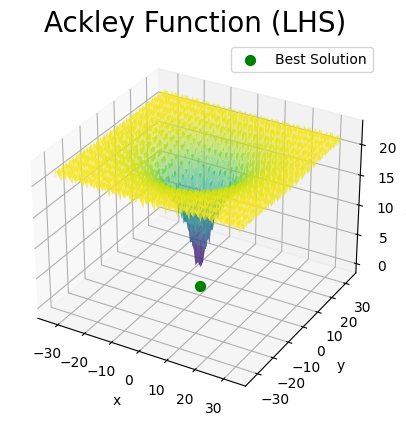

Running DE with Sobol sampling...
Iteration: 100
Iteration: 101
Sampling method: Sobol
Best solution: [-1.91672815e-12  1.92683886e-13]
Best fitness: 5.4503068724898185e-12


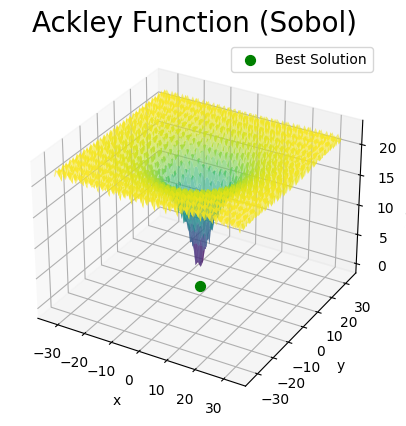

Running DE with Halton sampling...
Iteration: 100
Iteration: 101
Sampling method: Halton
Best solution: [-5.99351854e-13 -2.64713477e-12]
Best fitness: 7.677858349097733e-12


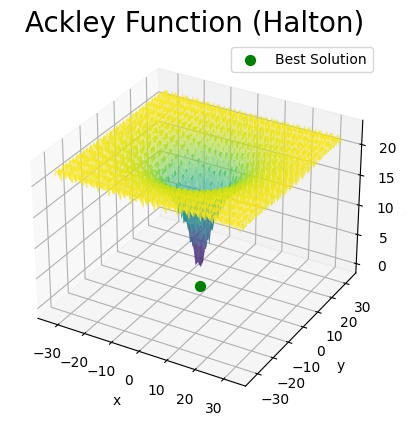

Running DE with UD sampling...
Iteration: 100
Iteration: 101
Sampling method: UD
Best solution: [-1.49685277e-12 -2.99806665e-12]
Best fitness: 9.479084184249587e-12


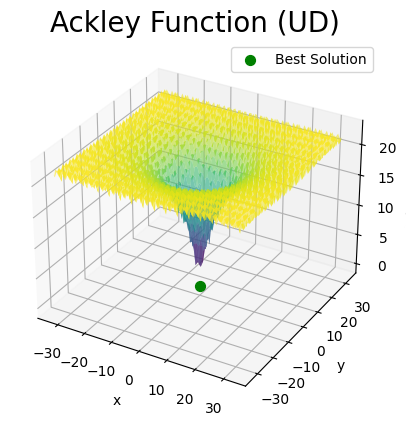

Running DE with PSOInitialization sampling...
Stopping search: Swarm best objective change less than 1e-08
Iteration: 100
Iteration: 101
Sampling method: PSOInitialization
Best solution: [ 1.88408477e-12 -1.68478207e-12]
Best fitness: 7.148504010956458e-12


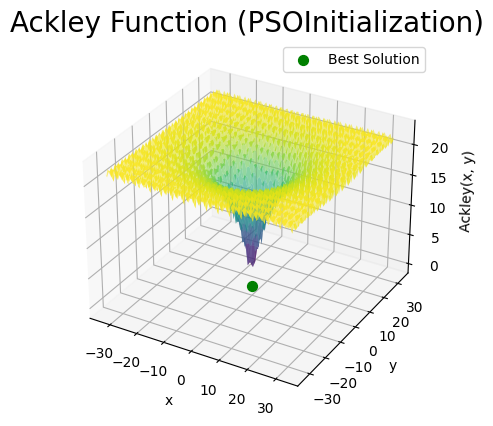

Running DE with Random sampling...
Iteration: 100
Iteration: 101
Sampling method: Random
Best solution: [-6.64406970e-11 -4.92410215e-11]
Best fitness: 2.3390755998775603e-10


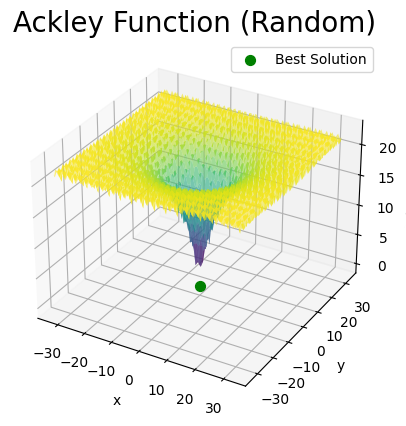

Running DE with CSFD sampling...
Iteration: 100
Iteration: 101
Sampling method: CSFD
Best solution: [ 3.06317109e-12 -1.28084399e-11]
Best fitness: 3.72506470114331e-11


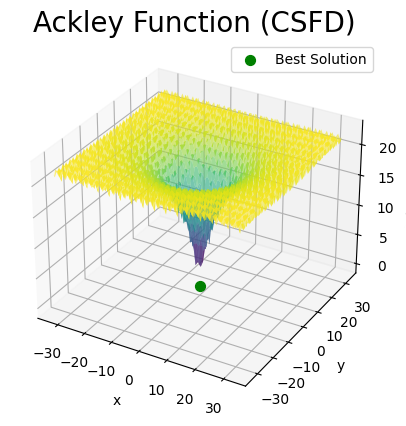


Best results for LHS:
Best solution: [8.02067726e-13 8.45447077e-13]
Best fitness: 0.000000000003
Best fitness (scientific): 3.297362383137e-12


Best results for Sobol:
Best solution: [-1.91672815e-12  1.92683886e-13]
Best fitness: 0.000000000005
Best fitness (scientific): 5.450306872490e-12


Best results for Halton:
Best solution: [-5.99351854e-13 -2.64713477e-12]
Best fitness: 0.000000000008
Best fitness (scientific): 7.677858349098e-12


Best results for UD:
Best solution: [-1.49685277e-12 -2.99806665e-12]
Best fitness: 0.000000000009
Best fitness (scientific): 9.479084184250e-12


Best results for PSOInitialization:
Best solution: [ 1.88408477e-12 -1.68478207e-12]
Best fitness: 0.000000000007
Best fitness (scientific): 7.148504010956e-12


Best results for Random:
Best solution: [-6.64406970e-11 -4.92410215e-11]
Best fitness: 0.000000000234
Best fitness (scientific): 2.339075599878e-10


Best results for CSFD:
Best solution: [ 3.06317109e-12 -1.28084399e-11]
Best fitness: 0.0000

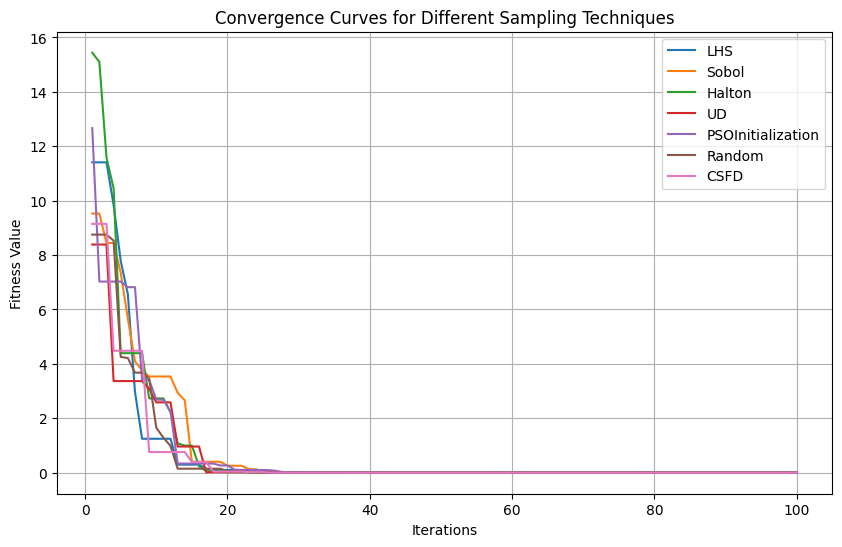

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pyDOE2 import lhs
from scipy.stats import qmc
from pyswarm import pso
from mpl_toolkits.mplot3d import Axes3D

# Ackley function definition. http://www.sfu.ca/~ssurjano/ackley.html
def ackley(x):
    n = x.size
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2 * np.pi * x))
    return -20 * np.exp(-0.2 * np.sqrt(sum1 / n)) - np.exp(sum2 / n) + 20 + np.exp(1)

# The maximum number of iterations is established.
dimensions = 2

# The limits of the search space are defined.
t = np.array([-32.768, 32.768])  # Adjusted limits for the Ackley function
f_range = np.tile(t, (dimensions, 1))

# The maximum number of iterations is established.
max_iter = 100

# Number of agents
num_agents = 16

# Function to initialize the population using different sampling techniques
def initialize_population(dimensions, f_range, num_agents, sampling_technique):
    if sampling_technique == "LHS":
        samples = lhs(dimensions, samples=num_agents, criterion="maximin", iterations=1000)
        agents = f_range[:, 0] + samples * (f_range[:, 1] - f_range[:, 0])
    elif sampling_technique == "Sobol":
        sobol_samples = qmc.Sobol(d=dimensions).random(num_agents)
        agents = f_range[:, 0] + sobol_samples * (f_range[:, 1] - f_range[:, 0])
    elif sampling_technique == "Halton":
        def halton_single(index, base):
            result = 0.0
            f = 1.0 / base
            i = index
            while i > 0:
                result += f * (i % base)
                i = int(i / base)
                f /= base
            return result

        agents = np.empty((num_agents, dimensions))
        for i in range(dimensions):
            sequence = np.zeros(num_agents)
            for j in range(num_agents):
                sequence[j] = halton_single(j + 1, 2 + i * 2)
            agents[:, i] = f_range[i, 0] + sequence * (f_range[i, 1] - f_range[i, 0])
    elif sampling_technique == "UD":
        ud_samples = qmc.LatinHypercube(d=dimensions).random(num_agents)
        agents = f_range[:, 0] + ud_samples * (f_range[:, 1] - f_range[:, 0])
    elif sampling_technique == "PSOInitialization":
        def pso_fitness(x):
            return ackley(x)

        lb = [f_range[0, 0], f_range[1, 0]]
        ub = [f_range[0, 1], f_range[1, 1]]
        _, best_fitness_pso = pso(pso_fitness, lb, ub, swarmsize=num_agents, maxiter=max_iter)
        agents = np.random.rand(num_agents, dimensions) * (f_range[:, 1] - f_range[:, 0]) + f_range[:, 0]
    elif sampling_technique == "Random":
        agents = np.random.rand(num_agents, dimensions) * (f_range[:, 1] - f_range[:, 0]) + f_range[:, 0]
    elif sampling_technique == "CSFD":
        lhs_samples = lhs(dimensions, samples=num_agents, criterion="maximin", iterations=1000)
        centered_samples = lhs_samples - 0.5
        agents = f_range[:, 0] + centered_samples * (f_range[:, 1] - f_range[:, 0])
    else:
        raise ValueError("Invalid sampling technique")

    return agents

# Function for Differential Evolution (DE) optimization
def differential_evolution(agents, max_iter, m, cross_p):
    dimensions = agents.shape[1]
    num_agents = agents.shape[0]
    best_position = None
    best_fitness = np.inf
    fitness = np.empty(num_agents)

    # Initialize an empty list to store the convergence data
    convergence_curve = []

    for i in range(num_agents):
        fitness[i] = ackley(agents[i])
        if fitness[i] < best_fitness:
            best_position = agents[i]
            best_fitness = fitness[i]

    iter = 1
    while iter <= max_iter:
        for i in range(num_agents):
            # Three different individuals are chosen.
            indexes = np.arange(num_agents)
            indexes = indexes[indexes != i]
            indexes = np.random.choice(indexes, 3, replace=False)
            agents_selected = agents[indexes]
            # The crossover operation is performed to obtain the mutant vector.
            mut = agents_selected[0] + m * (agents_selected[1] - agents_selected[2])
            # The differential mutation of the DE algorithm is performed.
            prob_vector = np.random.rand(dimensions) <= cross_p
            mut = agents[i] * prob_vector + mut * np.logical_not(prob_vector)

            # It is verified that the generated vector is within the search space defined by the upper and lower limits.
            for j in range(dimensions):
                upper_limit = f_range[j, 1]
                lower_limit = f_range[j, 0]

                if mut[j] < lower_limit:
                    mut[j] = lower_limit
                elif mut[j] > upper_limit:
                    mut[j] = upper_limit

            # The fitness value of the mutant vector is obtained.
            fitness_mut = ackley(mut)

            # The replacement mechanism is then performed.
            if fitness_mut < fitness[i]:
                agents[i] = mut
                fitness[i] = fitness_mut
                if fitness[i] < best_fitness:
                    best_position = agents[i]
                    best_fitness = fitness[i]

        # Append the best fitness at this iteration to the convergence_curve list
        convergence_curve.append(best_fitness)
        iter += 1
        if iter > 99:
            print("Iteration:", iter)

    return best_position, best_fitness, convergence_curve

# List of sampling techniques to compare
sampling_techniques = ["LHS", "Sobol", "Halton", "UD", "PSOInitialization", "Random", "CSFD"]

# Dictionary to store the results
results = {}

# Dictionary to store fitness values for each technique
fitness_values = {}
# Dictionary to store convergence curves for each technique
convergence_curves = {}

# Run DE for each sampling technique and store the results and convergence curves
for technique in sampling_techniques:
    print(f"Running DE with {technique} sampling...")
    agents = initialize_population(dimensions, f_range, num_agents, technique)
    best_position, best_fitness, convergence_curve = differential_evolution(agents, max_iter, 0.5, 0.2)
    results[technique] = (best_position, best_fitness)

    # Store the fitness value and convergence curve
    fitness_values[technique] = best_fitness
    convergence_curves[technique] = convergence_curve

    # Visualize the results if required
    print("Sampling method:", technique)
    print("Best solution:", best_position)
    print("Best fitness:", best_fitness)

    # Create a grid of points for plotting the Ackley function
    x = np.linspace(f_range[0, 0], f_range[0, 1], 100)
    y = np.linspace(f_range[1, 0], f_range[1, 1], 100)
    xGrid, yGrid = np.meshgrid(x, y)
    zGrid = np.zeros_like(xGrid)

    for i in range(100):
        for j in range(100):
            arr = np.array([xGrid[i, j], yGrid[i, j]])
            zGrid[i, j] = ackley(arr)

    plt.ion()
    fig = plt.figure(1)
    ax = fig.add_subplot(111, projection='3d')  # Use add_subplot to create 3D axes
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Ackley(x, y)')
    plt.title(f'Ackley Function ({technique})', fontsize=20)

    # Plot best solutions (green)
    if isinstance(best_position, np.ndarray):
        ax.scatter(best_position[0], best_position[1], ackley(best_position), c='green', s=50, marker="o",
                   label="Best Solution")

    ax.plot_surface(xGrid, yGrid, zGrid, cmap='viridis', alpha=0.6)
    plt.legend()
    plt.show(block=True)

# Print the best results for each sampling method
for method, result in results.items():
    print(f"\nBest results for {method}:")
    print(f"Best solution: {result[0]}")
    print(f"Best fitness: {result[1]:.12f}")  # Format fitness value with 12 decimal places

    # Additional formatting for the text output
    fitness_scientific = f"{result[1]:.12e}"  # Format as scientific notation with 12 decimal places
    print(f"Best fitness (scientific): {fitness_scientific}\n")

# Determine the "best technique" based on the lowest fitness value
best_technique = min(fitness_values, key=lambda k: fitness_values[k])
best_position = results[best_technique][0]
best_fitness = results[best_technique][1]

# Print the best results
print("Best sampling technique based on fitness:")
print(f"Sampling method: {best_technique}")
print(f"Best solution: {best_position}")
print(f"Best fitness: {best_fitness:.12f}")  # Format fitness value with 12 decimal places

# Find the best and worst results for each sampling method
best_fitness = float('inf')  # Initialize with positive infinity
worst_fitness = float('-inf')  # Initialize with negative infinity
best_results = []
worst_results = []

for method, result in results.items():
    if result[1] < best_fitness:
        best_fitness = result[1]
        best_results = [(method, result)]
    elif result[1] == best_fitness:
        best_results.append((method, result))

    if result[1] > worst_fitness:
        worst_fitness = result[1]
        worst_results = [(method, result)]
    elif result[1] == worst_fitness:
        worst_results.append((method, result))

# Print the best and worst results for each sampling method
print("Best sampling techniques (based on fitness):")
for method, result in best_results:
    print(f"Sampling method: {method}")
    print(f"Best solution: {result[0]}")
    print(f"Best fitness: {result[1]:.12f}")  # Format fitness value with 12 decimal places
    fitness_scientific = f"{result[1]:.12e}"  # Format as scientific notation with 12 decimal places
    print(f"Best fitness (scientific): {fitness_scientific}")

print("Worst sampling techniques (based on fitness):")
for method, result in worst_results:
    print(f"Sampling method: {method}")
    print(f"Worst solution: {result[0]}")
    print(f"Worst fitness: {result[1]:.12f}")  # Format fitness value with 12 decimal places
    fitness_scientific = f"{result[1]:.12e}"  # Format as scientific notation with 12 decimal places
    print(f"Worst fitness (scientific): {fitness_scientific}\n")

# Plot convergence curves
plt.figure(figsize=(10, 6))
for technique, curve in convergence_curves.items():
    plt.plot(range(1, len(curve) + 1), curve, label=technique)

plt.xlabel('Iterations')
plt.ylabel('Fitness Value')
plt.title('Convergence Curves for Different Sampling Techniques')
plt.legend()
plt.grid()
plt.show()

## Quasi-Monte Carlo Sampling (Latin Hypercube Sampling) - No se como implementar esa cosa

In [ ]:
# Quasi-Monte Carlo Sampling (Latin Hypercube Sampling)
lhs_samples = lhs(dimensions, samples=num_agents, criterion="maximin")
agents_lhs = f_range[:, 0] + lhs_samples * (f_range[:, 1] - f_range[:, 0])
best_position_lhs, best_fitness_lhs = run_optimization(agents_lhs, max_iter, 0.5, 0.2)
results['LatinHypercubeSampling'] = (best_position_lhs, best_fitness_lhs)

## Como le sacamos el gradiente a esta mare

In [ ]:
# Gradient-Based Initialization
from scipy.optimize import minimize
def gradient_fitness(x):
    return ackley(x)
x0 = np.array([0, 0])  # Initial guess for gradient-based initialization
result = minimize(gradient_fitness, x0, method='BFGS', options={'maxiter': max_iter})
best_position_gradient = result.x
best_fitness_gradient = result.fun
results['GradientBasedInitialization'] = (best_position_gradient, best_fitness_gradient)

## Orthogonal todavia no sirve

NameError: name 'special_ortho_group' is not defined

In [ ]:
from scipy.linalg import orth

In [ ]:
# Function to generate orthogonal arrays
def generate_orthogonal_arrays(dimensions, num_agents):
    # Generate a random matrix
    random_matrix = np.random.rand(dimensions, num_agents)

    # Use the Gram-Schmidt process to orthogonalize the matrix
    orthogonal_matrix, _ = np.linalg.qr(random_matrix)

    return orthogonal_matrix

# Generate orthogonal arrays for smart sampling
orthogonal_matrix = generate_orthogonal_arrays(dimensions, num_agents)

# Scale the orthogonal arrays to fit the search space
agents_orthogonal = f_range[:, 0] + (orthogonal_matrix - np.min(orthogonal_matrix, axis=0)) / (np.max(orthogonal_matrix, axis=0) - np.min(orthogonal_matrix, axis=0)) * (f_range[:, 1] - f_range[:, 0])

# Define the search space range for two dimensions
f_range = np.array([[-100, 100], [-100, 100]])

# Run optimization with orthogonal arrays
best_position_orthogonal, best_fitness_orthogonal = run_optimization(agents_orthogonal, max_iter, 0.5, 0.2)

# Store the results
results['OrthogonalArrays'] = (best_position_orthogonal, best_fitness_orthogonal)


NameError: ignored

## Stratified Sampling tampoco sirve aun


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (5,).

In [ ]:
# Stratified Sampling
strata = 5  # Number of strata
stratified_samples = []
for i in range(dimensions):
    stratum = np.linspace(f_range[i, 0], f_range[i, 1], strata + 1)
    stratified_samples.append(np.random.uniform(stratum[:-1], stratum[1:], size=num_agents // strata))
agents_stratified = np.vstack(stratified_samples).T
best_position_stratified, best_fitness_stratified = run_optimization(agents_stratified, max_iter, 0.5, 0.2)
results['Stratified'] = (best_position_stratified, best_fitness_stratified)